# Example Execution and Validation of nuc_syndat Package

The purpose of the nuc_syndat package is to generate synthetic experimental neutron cross section data for incident neutron energies corresponding to the Resolved Resonance Range. The purpose of this synthetic data is to be used as training data for a set of algorithms (ATARI) that help automate a large portion of the evaluation process.

This package was developed as a part of Noah Walton's<sup>1</sup> disseration work in collaboration with Jesse Brown<sup>2</sup> and Vladimir Sobes<sup>1</sup>.


<sup>1</sup> The University of Tennessee </br>
<sup>2</sup> Oak Ridge National Lab

# Import Modules

In [ ]:

import numpy as np
from matplotlib.pyplot import *
import syndat
import pandas as pd
import os

In [8]:
%matplotlib widget


# Generation/reduction methodology

The evaluation process takes reduced experimental data and fits an experimentally corrected theoretical model to that data. We will call this the evaluation point or evaluation object. For now, it is assumed that the theoretical model can be statistically generated such that the output cross section is a potential realization of the true cross section, just not the realization of the true cross section that is observed in our world (or perhaps there is a very very small probability that the same exact realization is statistically generated as is observed). Because this evaluation object is directly compared to the reduced experimental data, if we assume we have the true theoretical model, we can assume we have the true set of reduced experimental data with zero noise and zero uncertainty. 

write about the generation or un-reduction process

write about the noise/uncertainty addition and reduction process

A more in depth discussion of the methodology can be found in the article associated with this work. <a href="https://www.overleaf.com/read/gygkwfqyfpqv" target="_new">Walton, et al.</a>

In [9]:
sammy_directory =  os.path.realpath('../synthetic_data/Ta181')

opendata = os.path.join(sammy_directory,'rpi-open-ta181.csv')
sammy_xs = os.path.join(sammy_directory,'SAMMY.LST')

In [10]:
# generation/reduction options
perform_methods = True
add_noise = True
default_exp = True

gen = syndat.generation(perform_methods, default_exp, add_noise, opendata, sammy_xs)
red = syndat.reduction(perform_methods, gen)

# 

In [32]:


trans = red.trans
cov = red.CovT
tof = red.trans.tof


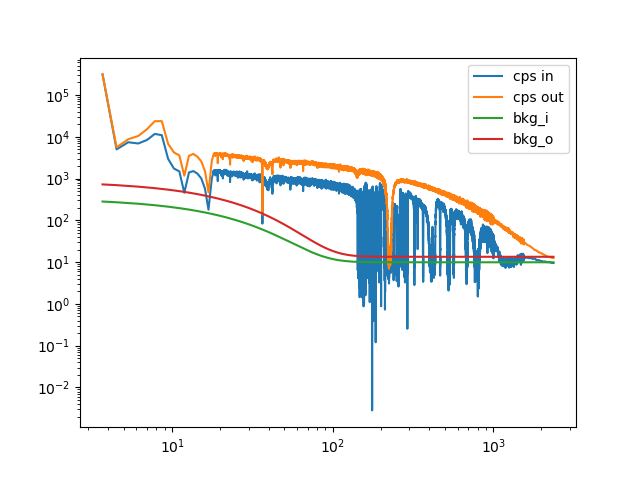

In [12]:
figure()
plot(tof,red.sdat.cps, label='cps in'); 
plot(tof,red.odat.cps, label='cps out'); 
xscale('log'); yscale('log')
plot(tof, red.redpar.val.ks*red.Bi+red.redpar.val.b0s, label='bkg_i')
plot(tof, red.redpar.val.ko*red.Bi+red.redpar.val.b0o, label='bkg_o')
legend()

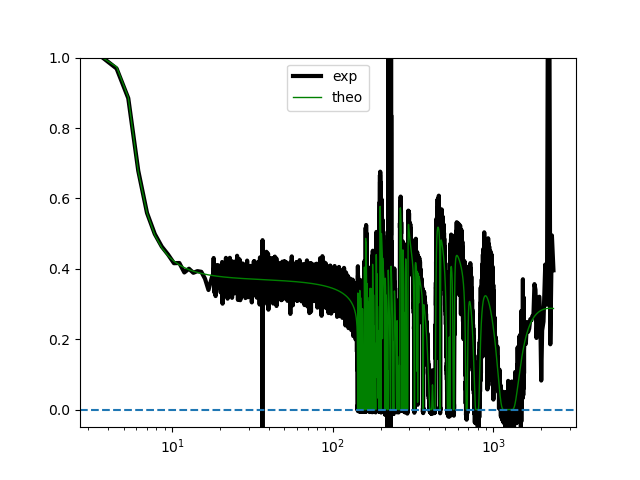

In [13]:
figure()
plot(tof,trans.expT, lw=3, c='k', label='exp')
plot(tof,trans.theo, lw=1,c='g', label='theo')
legend()
xscale('log')
# xlim([1e2,1e3])
ylim([-0.05,1])
axhline(y=0.0, ls='--')
#yscale('log')
# show(); close()

In [14]:
sum(abs(trans.theo-trans.expT))


624.8878462625237

Text(0.5, 0.98, 'My Reduced Data')

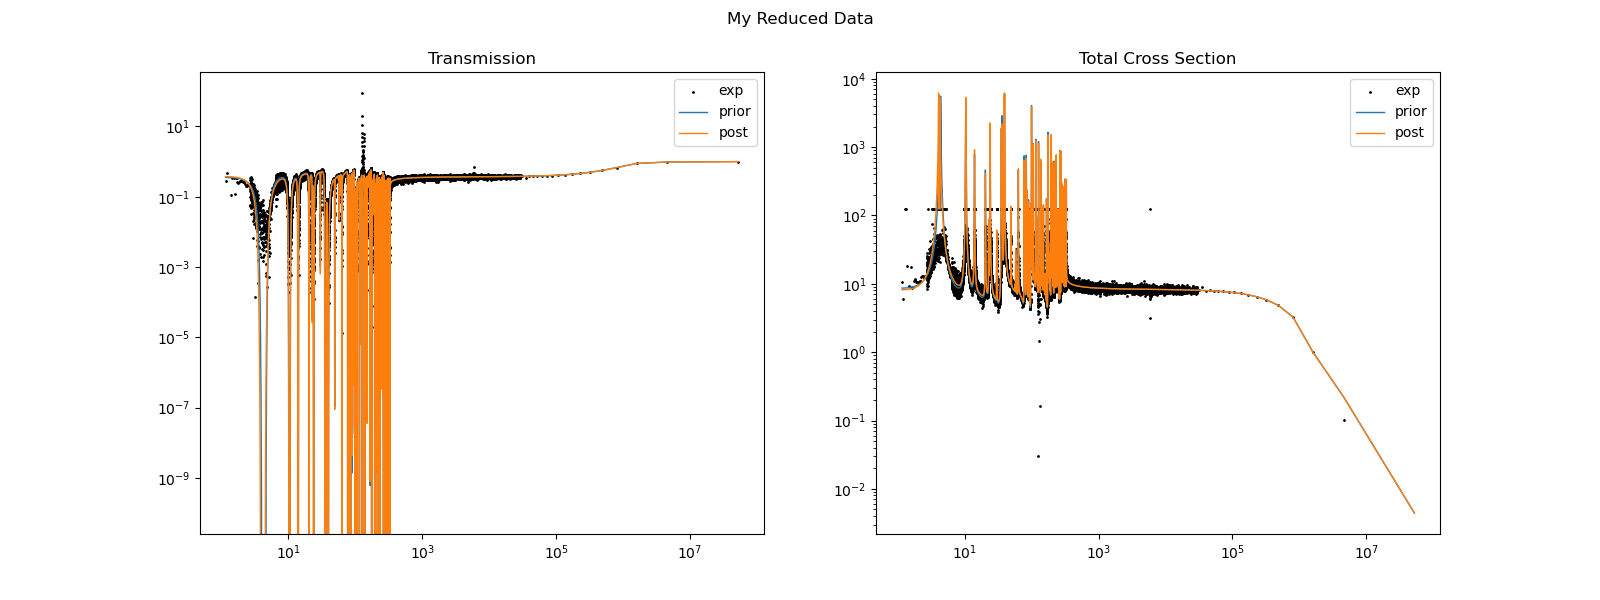

In [30]:
lst = syndat.sammy_interface.readlst("/Users/noahwalton/Documents/GitHub/nuc_syndat/synthetic_data/Ta181/newdat/SAMMY.LST")

fig, ax = subplots(1,2, figsize=(16,6))
ax[0].scatter(lst.E, lst.exp_trans, s=1, c='k', label='exp')
ax[0].plot(lst.E, lst.theo_trans, lw=1, label='prior')
ax[0].plot(lst.E, lst.theo_trans_bayes, lw=1, label='post')
ax[0].set_xscale('log'); ax[0].set_yscale('log')
ax[0].legend()
ax[0].set_title('Transmission')


ax[1].scatter(lst.E, lst.exp_xs, s=1, c='k', label='exp')
ax[1].plot(lst.E, lst.theo_xs, lw=1, label='prior')
ax[1].plot(lst.E, lst.theo_xs_bayes, lw=1, label='post')
ax[1].set_xscale('log'); ax[1].set_yscale('log')
ax[1].legend()
ax[1].set_title('Total Cross Section')

fig.suptitle('My Reduced Data')


In [17]:
sol_lst = syndat.sammy_interface.readlst("/Users/noahwalton/Documents/GitHub/nuc_syndat/synthetic_data/Ta181/newdat/SAMMY.LST")



Text(0.5, 0.98, 'Brown, J. Reduced Data')

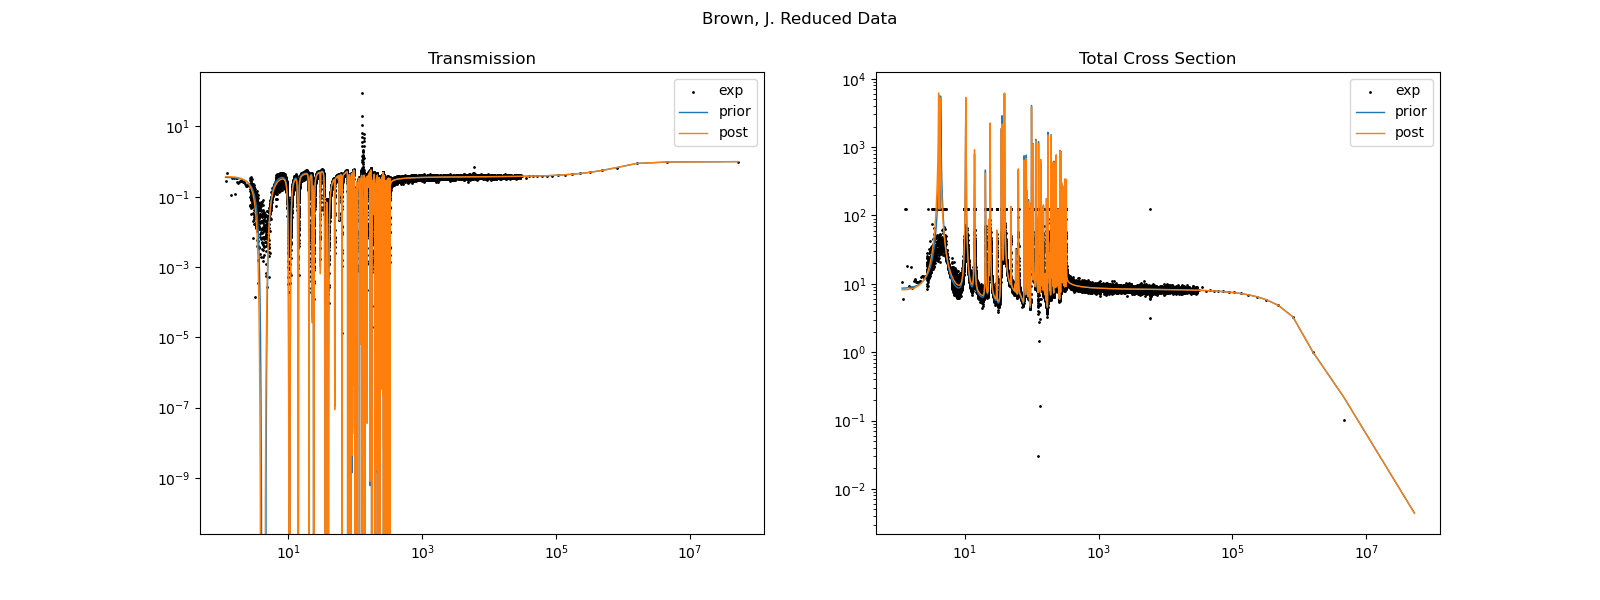

In [28]:
fig, ax = subplots(1,2,figsize=(16,6))
ax[0].scatter(sol_lst.E, sol_lst.exp_trans, s=1, c='k', label='exp')
ax[0].plot(sol_lst.E, sol_lst.theo_trans, lw=1, label='prior')
ax[0].plot(sol_lst.E, sol_lst.theo_trans_bayes, lw=1, label='post')
ax[0].set_xscale('log'); ax[0].set_yscale('log')
ax[0].legend()
ax[0].set_title('Transmission')

ax[1].scatter(sol_lst.E, sol_lst.exp_xs, s=1, c='k', label='exp')
ax[1].plot(sol_lst.E, sol_lst.theo_xs, lw=1, label='prior')
ax[1].plot(sol_lst.E, sol_lst.theo_xs_bayes, lw=1, label='post')
ax[1].set_xscale('log'); ax[1].set_yscale('log')
ax[1].legend()
ax[1].set_title('Total Cross Section')

fig.suptitle('Brown, J. Reduced Data')

In [33]:
min(sol_lst.exp_trans)

-14.604616